In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
import pydotplus
import math
import copy

In [ ]:
dataset = pd.read_csv('/content/tennis.csv')
X = dataset.iloc[:, 1:].values
print(X)
attribute = ['outlook', 'temp', 'humidity', 'wind']


[['Sunny' 'Hot' 'High' 'Weak' 'No']
 ['Sunny' 'Hot' 'High' 'Strong' 'No']
 ['Overcast' 'Hot' 'High' 'Weak' 'Yes']
 ['Rain' 'Mild' 'High' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Cool' 'Normal' 'Strong' 'No']
 ['Overcast' 'Cool' 'Normal' 'Strong' 'Yes']
 ['Sunny' 'Mild' 'High' 'Weak' 'No']
 ['Sunny' 'Cool' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Mild' 'Normal' 'Weak' 'Yes']
 ['Sunny' 'Mild' 'Normal' 'Strong' 'Yes']
 ['Overcast' 'Mild' 'High' 'Strong' 'Yes']
 ['Overcast' 'Hot' 'Normal' 'Weak' 'Yes']
 ['Rain' 'Mild' 'High' 'Strong' 'No']]


In [ ]:
class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.childs = None
 
def findEntropy(data, rows):
    yes = 0
    no = 0
    ans = -1
    idx = len(data[0]) - 1
    entropy = 0
    for i in rows:
        if data[i][idx] == 'Yes':
            yes = yes + 1
        else:
            no = no + 1
 
    x = yes/(yes+no)
    y = no/(yes+no)
    if x != 0 and y != 0:
      entropy = -1 * (x*math.log2(x) + y*math.log2(y))
    if x == 1:
        ans = 1
    if y == 1:
        ans = 0
    return entropy, ans
 
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        """if ans == 1:
            print("Yes")
        else:
            print("No")"""
        return maxGain, retidx, ans
 
    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy
 
        # print(mydict)
        for key in mydict:
            yes = 0
            no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'Yes':
                        yes = yes + 1
                    else:
                        no = no + 1
            # print(yes, no)
            x = yes/(yes+no)
            y = no/(yes+no)
# print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j
 
    return maxGain, retidx, ans
 
def buildTree(data, rows, columns):
 
    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    # print(maxGain
    #
    # )
    if maxGain == 0:
        if ans == 1:
            root.value = 'Yes'
        else:
            root.value = 'No'
        return root
 
    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1
 
    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        # print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root
 
def traverse(root):
    print(root.decision)
    print(root.value)
 
    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])
def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)

calculate()


Start
outlook
Sunny
humidity
High
No
Normal
Yes
Overcast
Yes
Rain
wind
Weak
Yes
Strong
No


In [ ]:
eps = np.finfo(float).eps
df = pd.read_csv('/content/tennis1.csv')

In [ ]:
def find_entropy(df):
  target = df.keys()[-1]
  entropy = 0
  values = df[target].unique()
  for value in values:
    fraction = df[target].value_counts()[value] / len(df[target])
    entropy += -fraction * np.log2(fraction)
  return entropy

def find_entropy_attribute(df, attribute):
  target = df.keys()[-1]
  target_variables = df[target].unique()
  variables = df[attribute].unique()
  entropy2 = 0
  for variable in variables:
    entropy = 0
    for target_variable in target_variables:
      num = len(df[attribute][df[attribute] == variable][df[target] == target_variable])
      den = len(df[attribute][df[attribute] == variable])
      fraction = num / (den + eps)
      entropy += -fraction * np.log2(fraction + eps)
      fraction2 = den / len(df)
      entropy2 += -fraction2 * entropy
  return abs(entropy2)

In [ ]:
def bestClassifier(df):
  IG = []
  for key in df.keys()[:-1]:
    IG.append(find_entropy(df) - find_entropy_attribute(df,key))
  return df.keys()[:-1][np.argmax(IG)]

In [ ]:
def get_subtable(df, node, value):
  return df[df[node] == value].reset_index(drop=True)

def ID3split(df, tree=None):
  target = df.keys()[-1]
  node = bestClassifier(df)
  attributeValues = np.unique(df[node])
  if tree is None:
    tree = {}
    tree[node] = {}
  for value in attributeValues:
      subtable = get_subtable(df, node, value)
      targetValues, counts = np.unique(subtable[target], return_counts = True)
      if len(counts) == 1:
        tree[node][value]= targetValues[0]
      else:
        tree[node][value] = ID3split(subtable)
  return tree;

In [ ]:
ID3split(df)

{'outlook': {'Overcast': 'Yes',
  'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
  'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

In [ ]:
def plot_decision_tree(clf, feature_name, target_name):
  dot_data = StringIO()
  tree.export_graphviz(clf, out_file = dot_data,
                       feature_names = feature_name,
                       class_names = target_name,
                       filled = True, rounded = True,
                       special_characters = True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  return Image(graph.create_png())

In [ ]:
df = pd.read_csv('/content/tennis1.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['outlook'] = Le.fit_transform(df['outlook'])
df['temp'] = Le.fit_transform(df['temp']) 
df['humidity'] = Le.fit_transform(df['humidity'])
df['wind'] = Le.fit_transform(df['wind'])
df['play'] = Le.fit_transform(df['play'])
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

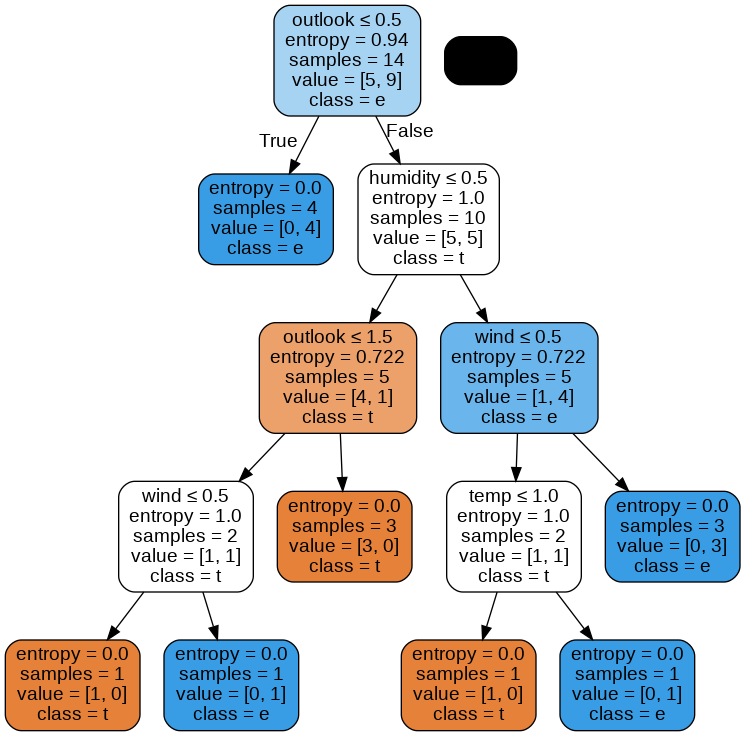

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x,y)
plot_decision_tree(clf, x.columns, df.columns[1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
import pydotplus
import math
import copy

In [ ]:
dataset = pd.read_csv('/content/cau2tuan2.csv')
X = dataset.iloc[:, 1:].values
print(X)
attribute = ['age', 'sex', 'bp', 'cholesterol', 'drug']

[['young' 'f' 'high' 'normal' 'drug a']
 ['young' 'f' 'high' 'high' 'drug a']
 ['middle-age' 'f' 'high' 'normal' 'drug b']
 ['senior' 'f' 'normal' 'normal' 'drug b']
 ['senior' 'm' 'low' 'normal' 'drug b']
 ['senior' 'm' 'low' 'high' 'drug a']
 ['middle-age' 'm' 'low' 'high' 'drug b']
 ['young' 'f' 'normal' 'normal' 'drug a']
 ['young' 'm' 'low' 'normal' 'drug b']
 ['senior' 'm' 'normal' 'normal' 'drug b']
 ['young' 'm' 'normal' 'high' 'drug b']
 ['middle-age' 'f' 'normal' 'high' 'drug b']
 ['middle-age' 'm' 'high' 'normal' 'drug b']
 ['senior' 'f' 'normal' 'high' 'drug a']
 ['middle-age' 'f' 'low' 'normal' '?']]


In [ ]:
class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.childs = None
 
def findEntropy(data, rows):
    a = 0
    b = 0
    ans = -1
    idx = len(data[0]) - 1
    entropy = 0
    for i in rows:
        if data[i][idx] == 'drug a':
            a = a + 1
        else:
            b = b + 1
 
    x = a/(a+b)
    y = b/(a+b)
    if x != 0 and y != 0:
      entropy = -1 * (x*math.log2(x) + y*math.log2(y))
    if x == 1:
        ans = 1
    if y == 1:
        ans = 0
    return entropy, ans
    
 
def findMaxGain(data, rows, columns):
    maxGain = 0
    retidx = -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        """if ans == 1:
            print("drug a")
        else:
            print("drug b")"""
        return maxGain, retidx, ans
 
    for j in columns:
        mydict = {}
        idx = j
        for i in rows:
            key = data[i][idx]
            if key not in mydict:
                mydict[key] = 1
            else:
                mydict[key] = mydict[key] + 1
        gain = entropy
 
        # print(mydict)
        for key in mydict:
            a = 0
            b = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == 'drug a':
                        a = a + 1
                    else:
                        b = b + 1
            # print(yes, no)
            x = a/(a+b)
            y = b/(a+b)
# print(x, y)
            if x != 0 and y != 0:
                gain += (mydict[key] * (x*math.log2(x) + y*math.log2(y)))/14
        # print(gain)
        if gain > maxGain:
            # print("hello")
            maxGain = gain
            retidx = j
 
    return maxGain, retidx, ans
 
def buildTree(data, rows, columns):
 
    maxGain, idx, ans = findMaxGain(X, rows, columns)
    root = Node()
    root.childs = []
    # print(maxGain
    #
    # )
    if maxGain == 0:
        if ans == 1:
            root.value = 'drug a'
        else:
            root.value = 'drug b'
        return root
 
    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        if key not in mydict:
            mydict[key] = 1
        else:
            mydict[key] += 1
 
    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = []
        for i in rows:
            if data[i][idx] == key:
                newrows.append(i)
        # print(newrows)
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root
 
def traverse(root):
    print(root.decision)
    print(root.value)
 
    n = len(root.childs)
    if n > 0:
        for i in range(0, n):
            traverse(root.childs[i])
def calculate():
    rows = [i for i in range(0, 14)]
    columns = [i for i in range(0, 4)]
    root = buildTree(X, rows, columns)
    root.decision = 'Start'
    traverse(root)

calculate()


Start
age
young
sex
f
drug a
m
drug b
middle-age
drug b
senior
cholesterol
normal
drug b
high
drug a


In [ ]:
eps = np.finfo(float).eps
df = pd.read_csv('/content/cau2tuan2a.csv')

In [ ]:
def find_entropy(df):
  target = df.keys()[-1]
  entropy = 0
  values = df[target].unique()
  for value in values:
    fraction = df[target].value_counts()[value] / len(df[target])
    entropy += -fraction * np.log2(fraction)
  return entropy

def find_entropy_attribute(df, attribute):
  target = df.keys()[-1]
  target_variables = df[target].unique()
  variables = df[attribute].unique()
  entropy2 = 0
  for variable in variables:
    entropy = 0
    for target_variable in target_variables:
      num = len(df[attribute][df[attribute] == variable][df[target] == target_variable])
      den = len(df[attribute][df[attribute] == variable])
      fraction = num / (den + eps)
      entropy += -fraction * np.log2(fraction + eps)
      fraction2 = den / len(df)
      entropy2 += -fraction2 * entropy
  return abs(entropy2)

In [ ]:
def bestClassifier(df):
  IG = []
  for key in df.keys()[:-1]:
    IG.append(find_entropy(df) - find_entropy_attribute(df,key))
  return df.keys()[:-1][np.argmax(IG)]

In [ ]:
def get_subtable(df, node, value):
  return df[df[node] == value].reset_index(drop=True)

def ID3split(df, tree=None):
  target = df.keys()[-1]
  node = bestClassifier(df)
  attributeValues = np.unique(df[node])
  if tree is None:
    tree = {}
    tree[node] = {}
  for value in attributeValues:
      subtable = get_subtable(df, node, value)
      targetValues, counts = np.unique(subtable[target], return_counts = True)
      if len(counts) == 1:
        tree[node][value]= targetValues[0]
      else:
        tree[node][value] = ID3split(subtable)
  return tree;

In [ ]:
ID3split(df)

{'age': {'middle-age': {'bp': {'high': 'drug b',
    'low': {'sex': {'f': '?', 'm': 'drug b'}},
    'normal': 'drug b'}},
  'senior': {'cholesterol': {'high': 'drug a', 'normal': 'drug b'}},
  'young': {'sex': {'f': 'drug a', 'm': 'drug b'}}}}

In [ ]:
def plot_decision_tree(clf, feature_name, target_name):
  dot_data = StringIO()
  tree.export_graphviz(clf, out_file = dot_data,
                       feature_names = feature_name,
                       class_names = target_name,
                       filled = True, rounded = True,
                       special_characters = True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  return Image(graph.create_png())

In [ ]:
df = pd.read_csv('/content/cau2tuan2a.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['age'] = Le.fit_transform(df['age'])
df['sex'] = Le.fit_transform(df['sex']) 
df['bp'] = Le.fit_transform(df['bp'])
df['cholesterol'] = Le.fit_transform(df['cholesterol'])
df['drug'] = Le.fit_transform(df['drug'])
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

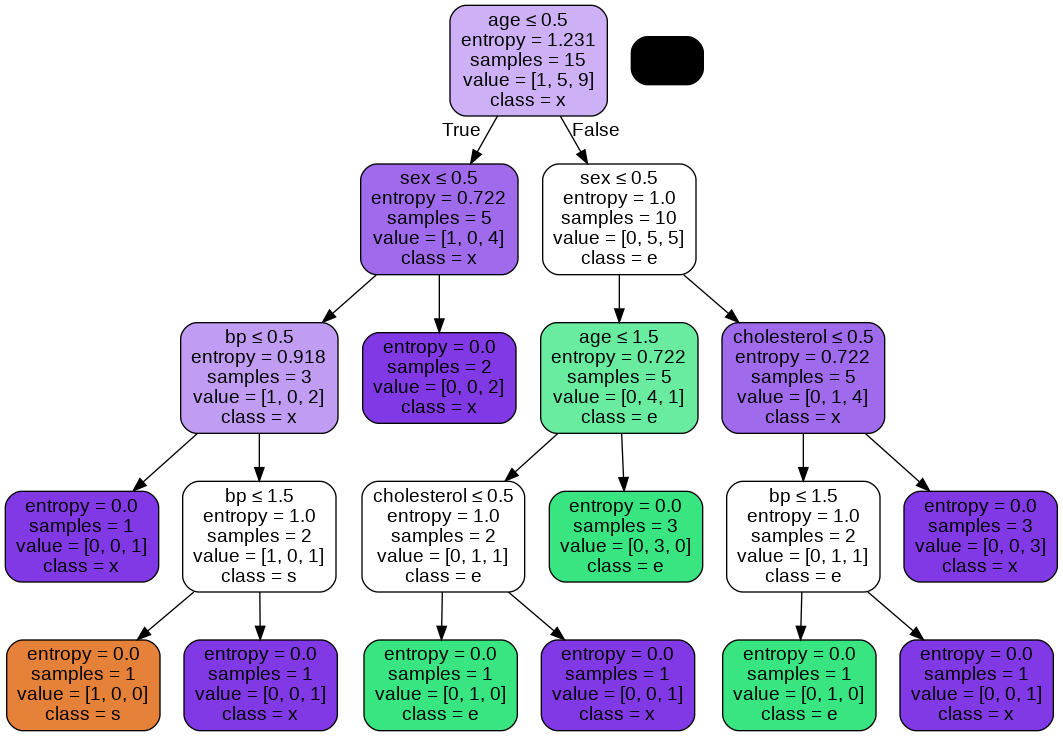

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x,y)
plot_decision_tree(clf, x.columns, df.columns[1])